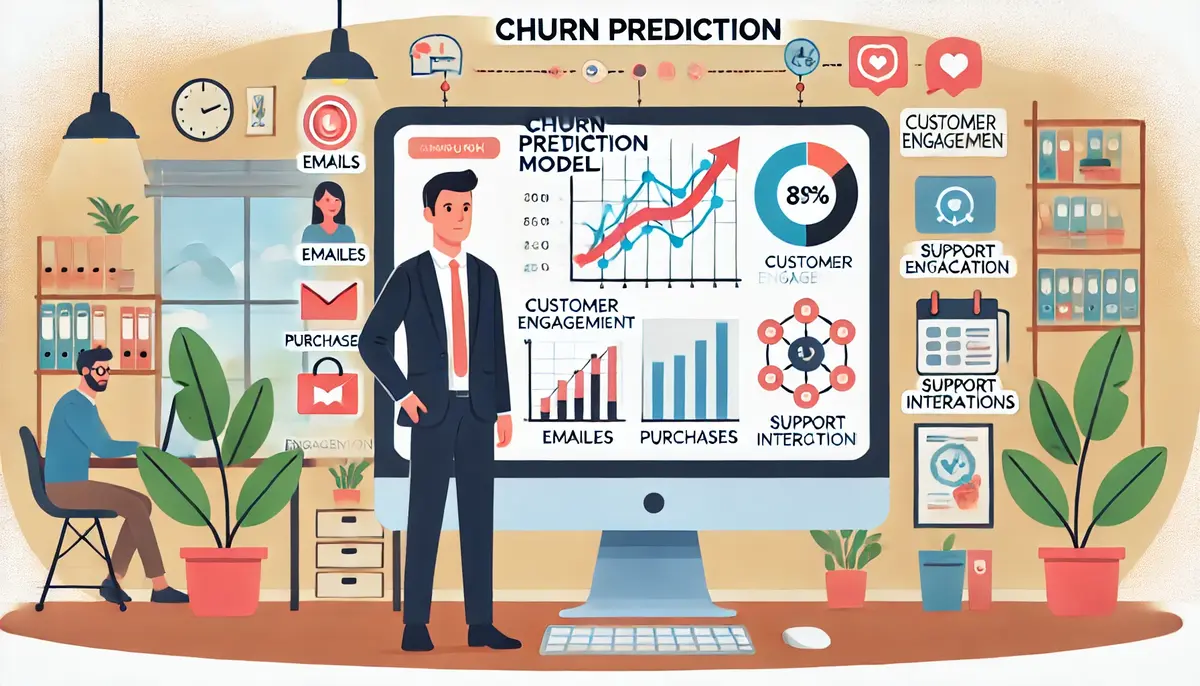

# **Cutomer Churn Prediction Model**

@ Preapred By: Chandan D. Chaudhari

@ Github: https://github.com/chandanc5525

In [1]:
# import data manipulation libraries
import pandas as pd
import numpy as np
# import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# import filterwarning libraries
import warnings
warnings.filterwarnings('ignore')
# import logging libraries
import logging
logging.basicConfig(filename = 'CutomerChurn.log',
                    format = '%(asctime)s %(levelname)s %(message)s',
                    level = logging.INFO,
                    filemode = 'w')
# import sklearn libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# import pickle libraries
import pickle
#import deep learning-keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [2]:
try:
  url = 'https://raw.githubusercontent.com/chandanc5525/Data-Science-BootCamp/refs/heads/main/Dataset/Churn_Modelling.csv'
  data = pd.read_csv(url)
  logging.info('Data Connection Successfully Established...')
except:
  logging.warning('Data Connection Failed...')

In [3]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
529,530,15694272,Nkemakolam,673,France,Male,30,1,64097.75,1,1,1,77783.35,0
8874,8875,15684318,McMillan,582,Germany,Female,50,6,96486.57,2,1,1,20344.02,0
8388,8389,15806570,Y?an,763,France,Female,53,4,0.00,1,1,0,77203.72,1
1174,1175,15588670,Despeissis,705,Spain,Female,40,5,203715.15,1,1,0,179978.68,1
2303,2304,15635078,Chiemela,714,Spain,Male,45,0,124693.48,1,0,1,187194.15,0


In [4]:
from collections import OrderedDict

stats = []

for i in data.columns:
  if data[i].dtype != 'object':
    stats_report = OrderedDict({
      'Feaure': i,
      'Q1': np.percentile(data[i], 25),
      'Median': np.percentile(data[i], 50),
      'Q3': np.percentile(data[i], 75),
      'IQR': np.percentile(data[i], 75) - np.percentile(data[i], 25),
      'Min': data[i].min(),
      'Max': data[i].max(),
      'Mean': data[i].mean(),
      'Std': data[i].std(),
      'Skewness': data[i].skew(),
      'Kurtosis': data[i].kurt(),
      'Missing Values': data[i].isnull().sum(),
      'Unique Values': data[i].nunique()
        })
    stats.append(stats_report)

numerical_summary = pd.DataFrame(stats)
numerical_summary

,Feaure,Q1,Median,Q3,IQR,Min,Max,Mean,Std,Skewness,Kurtosis,Missing Values,Unique Values
0,RowNumber,2500.75,5.000500e+03,7.500250e+03,4999.5000,1.00,10000.00,5.000500e+03,2886.895680,0.000000,-1.200000,0,10000
1,CustomerId,15628528.25,1.569074e+07,1.575323e+07,124705.5000,15565701.00,15815690.00,1.569094e+07,71936.186123,0.001149,-1.196113,0,10000
2,CreditScore,584.00,6.520000e+02,7.180000e+02,134.0000,350.00,850.00,6.505288e+02,96.653299,-0.071607,-0.425726,0,460
3,Age,32.00,3.700000e+01,4.400000e+01,12.0000,18.00,92.00,3.892180e+01,10.487806,1.011320,1.395347,0,70
4,Tenure,3.00,5.000000e+00,7.000000e+00,4.0000,0.00,10.00,5.012800e+00,2.892174,0.010991,-1.165225,0,11
5,Balance,0.00,9.719854e+04,1.276442e+05,127644.2400,0.00,250898.09,7.648589e+04,62397.405202,-0.141109,-1.489412,0,6382
6,NumOfProducts,1.00,1.000000e+00,2.000000e+00,1.0000,1.00,4.00,1.530200e+00,0.581654,0.745568,0.582981,0,4
7,HasCrCard,0.00,1.000000e+00,1.000000e+00,1.0000,0.00,1.00,7.055000e-01,0.455840,-0.901812,-1.186973,0,2
8,IsActiveMember,0.00,1.000000e+00,1.000000e+00,1.0000,0.00,1.00,5.151000e-01,0.499797,-0.060437,-1.996747,0,2
9,EstimatedSalary,51002.11,1.001939e+05,1.493882e+05,98386.1375,11.58,199992.48,1.000902e+05,57510.492818,0.002085,-1.181518,0,9999


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data = data.drop(columns= ['RowNumber', 'CustomerId', 'Surname'],axis=1)
data.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2740,650,Germany,Male,34,4,142393.11,1,1,1,11276.48,0
2185,739,Spain,Male,40,1,109681.61,1,1,1,193321.30,0
4102,662,Spain,Male,33,3,0.00,2,0,1,68064.83,0


In [8]:
data = pd.get_dummies(data,columns = ['Geography','Gender'],drop_first=True,dtype = int)
data.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
910,604,36,6,116229.85,2,1,1,79633.38,0,0,0,1
2032,667,37,5,92171.35,3,1,0,178106.34,1,1,0,0
4908,540,48,2,109349.29,1,1,0,88703.04,1,0,0,1


In [9]:
X = data.drop(columns = ['Exited'],axis = 1)
y = data['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state= 42)

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(units = 12,activation = 'relu',input_dim = 11))
model.add(Dense(units = 6,activation = 'relu'))
model.add(Dense(units = 4,activation = 'relu'))
model.add(Dense(units = 4,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275 (1.07 KB)

 Trainable params: 275 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_history = model.fit(X_train,y_train,epochs = 300,batch_size = 32,validation_data = (X_test,y_test))

Epoch 1/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7409 - loss: 0.6270 - val_accuracy: 0.8012 - val_loss: 0.4817
Epoch 2/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7927 - loss: 0.4835 - val_accuracy: 0.8012 - val_loss: 0.4607
Epoch 3/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7971 - loss: 0.4683 - val_accuracy: 0.8012 - val_loss: 0.4532
Epoch 4/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7978 - loss: 0.4569 - val_accuracy: 0.8012 - val_loss: 0.4447
Epoch 5/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7999 - loss: 0.4410 - val_accuracy: 0.8012 - val_loss: 0.4399
Epoch 6/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7976 - loss: 0.4364 - val_accuracy: 0.8012 - val_loss: 0.4292
Epoch 7/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7968 - loss: 0.4342 - val_accuracy: 0.8084 - val_loss: 0.4238
Epoch 8/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8082 - loss: 0.4288 - val_acc

Text(0, 0.5, 'Loss')

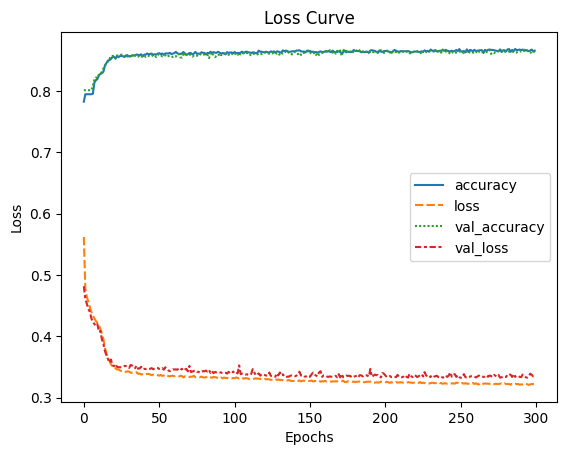

In [13]:
sns.lineplot(model_history.history)
sns.set_style('darkgrid')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [14]:
model.evaluate(X_test,y_test,batch_size= 20)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3343


[0.3378576934337616, 0.8628000020980835]

In [15]:
model.evaluate(X_train,y_train,batch_size=20)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8698 - loss: 0.3186


[0.32256031036376953, 0.8659999966621399]

In [16]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


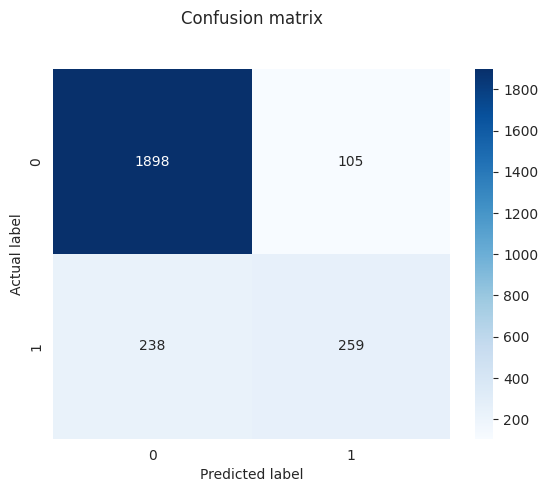

In [17]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap = 'Blues',fmt = 'd')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2003
           1       0.71      0.52      0.60       497

    accuracy                           0.86      2500
   macro avg       0.80      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



## **Tunning Model Perfomance Using Dropout Technique**

- Dropout regularization is a technique used in deep learning to prevent overfitting by randomly turning off a fraction of neurons during training. This means that at each step, some neurons are temporarily ignored, so they do not contribute to the forward pass or backpropagation. By doing this, the model is encouraged to learn more robust and general patterns rather than relying too heavily on specific neurons.

- During testing or inference, dropout is not applied. Instead, the model adjusts the weights to ensure consistency in its predictions. This method is simple yet powerful, making neural networks less likely to overfit on the training data while improving their ability to generalize to new data. It’s commonly used in tasks like image recognition, natural language processing, and more.

- The dropout value, or rate, determines the fraction of neurons randomly deactivated during training to prevent overfitting. Typically, values range from 0.1 to 0.2 for input layers and 0.2 to 0.5 for hidden layers, depending on the model size and complexity of the task. Low values provide minimal regularization, while very high values can cause underfitting. Choosing the right dropout rate often requires experimentation to balance regularization with learning capacity.

- Note: p is the fraction of input units to drop. If suppose there are ten neurons from a layer and p is 0.1 then one of the neurons would be disabled and its output would not be sent to the further layer.
It is advisable to start with p 0.1 and move to higher values when in case the overfitting problem persists. Also going over 0.5 is not advisable generally because it may cause underfitting as most of the neurons are disabled.

In [19]:
model1 = Sequential()
model1.add(Dense(units = 12,activation = 'relu',input_dim = 11))
model1.add(Dropout(rate = 0.1))
model1.add(Dense(units = 6,activation = 'relu'))
model1.add(Dropout(rate = 0.1))
model1.add(Dense(units = 4,activation = 'relu'))
model1.add(Dropout(rate = 0.1))
model1.add(Dense(units = 4,activation = 'relu'))
model1.add(Dropout(rate = 0.1))
model1.add(Dense(units = 1,activation = 'sigmoid'))

model1.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

print(model1.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275 (1.07 KB)

 Trainable params: 275 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
model_history1 = model1.fit(X_train,y_train,epochs = 300,batch_size = 32,validation_data = (X_test,y_test))

Epoch 1/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6470 - loss: 0.6608 - val_accuracy: 0.8012 - val_loss: 0.5139
Epoch 2/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7889 - loss: 0.5293 - val_accuracy: 0.8012 - val_loss: 0.4902
Epoch 3/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7872 - loss: 0.5089 - val_accuracy: 0.8012 - val_loss: 0.4739
Epoch 4/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.4865 - val_accuracy: 0.8012 - val_loss: 0.4653
Epoch 5/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.4829 - val_accuracy: 0.8012 - val_loss: 0.4582
Epoch 6/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.4807 - val_accuracy: 0.8016 - val_loss: 0.4437
Epoch 7/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8043 - loss: 0.4613 - val_accuracy: 0.8104 - val_loss: 0.4358
Epoch 8/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8045 - loss: 0.4607 - val_accu

Text(0, 0.5, 'Loss')

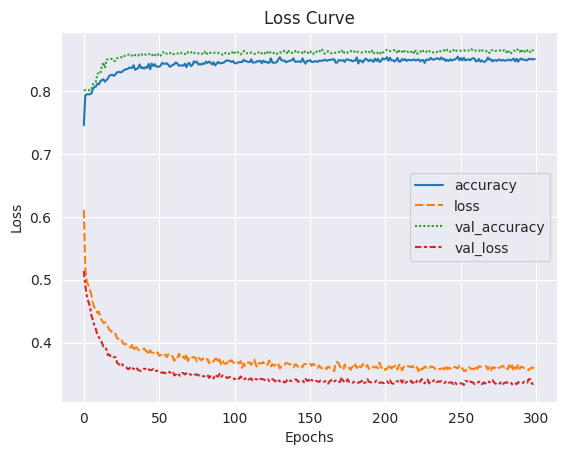

In [21]:
sns.lineplot(model_history1.history)
sns.set_style('darkgrid')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [22]:
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


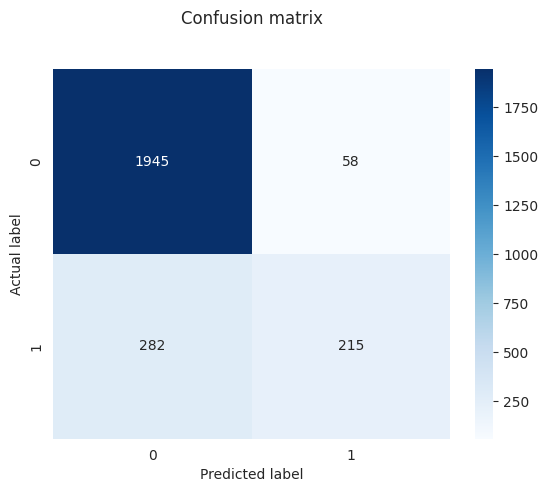

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot = True,cmap = 'Blues',fmt = 'd')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2003
           1       0.79      0.43      0.56       497

    accuracy                           0.86      2500
   macro avg       0.83      0.70      0.74      2500
weighted avg       0.86      0.86      0.85      2500



## **Checking Model Performance Using Hyper Parameter Tuning Technique -  Randomized Search CV Method**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
rf = RandomForestClassifier()

In [26]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
rf_grid = { 'n_estimators': np.arange(10,1000,50),
            'max_depth': [None,3,5,10],
            'min_samples_leaf': np.arange(2,20,2),
            'min_samples_split': np.arange(1,20,2)
           }

np.random.seed(42)

randomforest = RandomizedSearchCV(RandomForestClassifier(),param_distributions = rf_grid,cv =5, n_iter = 20,verbose= True)
randomforest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
randomforest.best_params_

{'n_estimators': 460,
 'min_samples_split': 17,
 'min_samples_leaf': 8,
 'max_depth': None}

In [29]:
hyperparameters = {
    'n_estimators': 460,
    'min_samples_split': 17,
    'min_samples_leaf': 8,
    'random_state': 42}
randomforest = RandomForestClassifier(**hyperparameters)
randomforest.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=8, min_samples_split=17,
                       n_estimators=460, random_state=42)

In [30]:
accuracy = randomforest.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
y_pred_rf = randomforest.predict(X_test)
accuracy_alt = accuracy_score(y_test, y_pred)
print(f"Accuracy (alternative method): {accuracy_alt:.2f}")

Accuracy: 0.87
Accuracy (alternative method): 0.86


## **Saving Pickle File For Production**

In [31]:
import pickle

filename = 'CustomerChurnModel.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [32]:
import pickle

# File name of the pickled model
filename = 'CustomerChurnModel.pkl'

# Load the model
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the `loaded_model` for predictions or other tasks
predictions = loaded_model.predict(X_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [33]:
predictions = (predictions > 0.5).astype(int)

In [34]:
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 86.28%
